# KASDD TK | a
Siapa tim yang paling banyak memenangkan pertandingan grand final dari sebuah Event

In [25]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install pandas numpy seaborn scipy plotly matplotlib   

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
REFERENCE = [
    'https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy',
    
    ]

In [27]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import scipy.stats as scp
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [28]:
# mencari jumlah nilai unik pada kolom yang bertipe kategorik
def check_uniqueness(df):
    for col in df.select_dtypes(include=object).columns:
        print('No. of unique values in column '+col+':')
        print(df[col].value_counts(),'\n')
        
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

# mengecek nilai duplikat
def check_duplicates(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

# mengecek keberadaan outlier (harus numerik)
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())
    
    print("Persentase outlier terhadap data per kolom")
    for col in outliers.keys():
        percentage = outliers[col] / len(df)
        print(col)
        print(percentage)
        print()

    return outliers

# Cek nilai outlier & mengembalikan list nama kolom dengan outlier
def outlier_col(dict, total_data):
    outlier_col = []

    print("Persentase outlier terhadap data per kolom")
    for col in dict.keys():
        percentage = dic[col] / total_data
        if 0 < percentage < 1:
            outlier_col.append(col)
    return outlier_col

def drop_outlier(col_to_check, df):
    Q1 = df[col_to_check].quantile(0.25)
    Q3 = df[col_to_check].quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    mask = (df[col_to_check] >= lower_limit) & (df[col_to_check] <= upper_limit)
    new_df = df[mask]
    return new_df

# Read Dataset

In [29]:
df = pd.read_csv('dataset_final/final_dataset.csv')
df.head()

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,...,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,60894,8419.0,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,466.0,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,3712.0,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,5099.0,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,3983.0,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


In [30]:
tour_patch1 = df[(df['Patch'] == 1.0)]
tour_patch2 = df[(df['Patch'] == 2.0)]
tour_patch3 = df[(df['Patch'] == 3.0)]

tour_patch_list = [tour_patch1, tour_patch2, tour_patch3]

C:\Users\vinse\AppData\Local\Temp\ipykernel_4748\2984422808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tour_patch_list[i], x='Map', order=order.index, palette='magma')


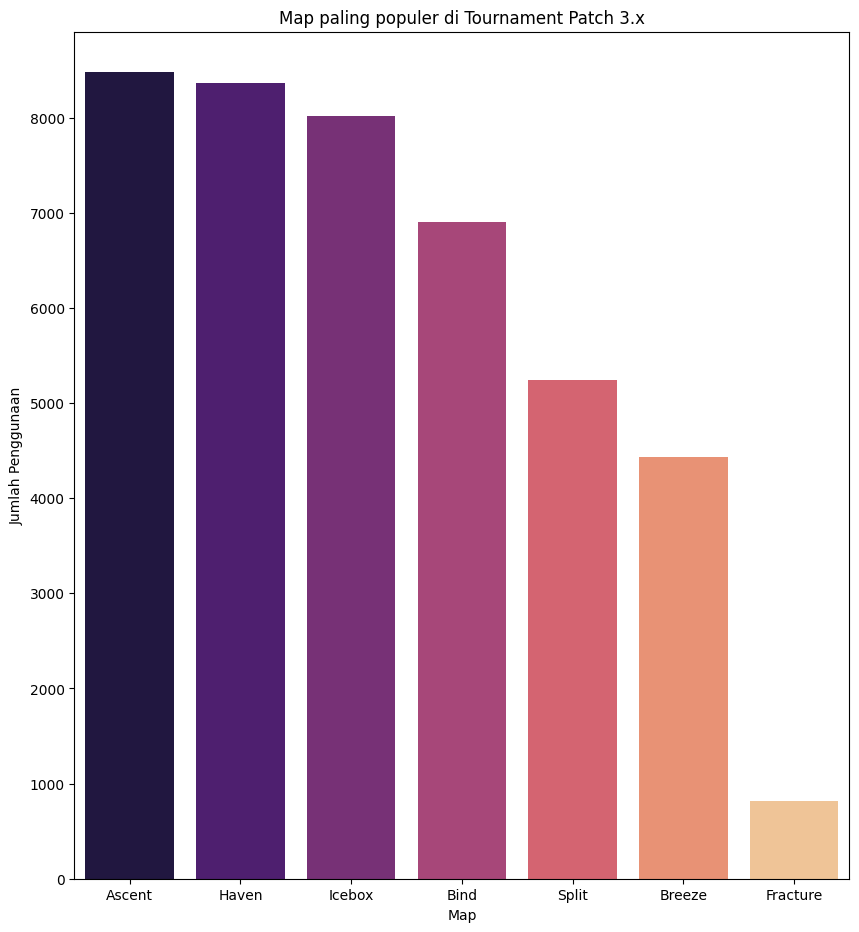

In [44]:
plt.figure(figsize=(10, 11))
for i in range(2, 3):
    order = tour_patch_list[i]['Map'].value_counts()
    sns.countplot(data=tour_patch_list[i], x='Map', order=order.index, palette='magma')
    plt.title(f'Map paling populer di Tournament Patch {i+1}.x')
    plt.xlabel('Map')
    plt.ylabel('Jumlah Penggunaan')
    plt.show()

C:\Users\vinse\AppData\Local\Temp\ipykernel_4748\136764606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='Map', order=order.index, palette='magma').set_ylim(0,4000)


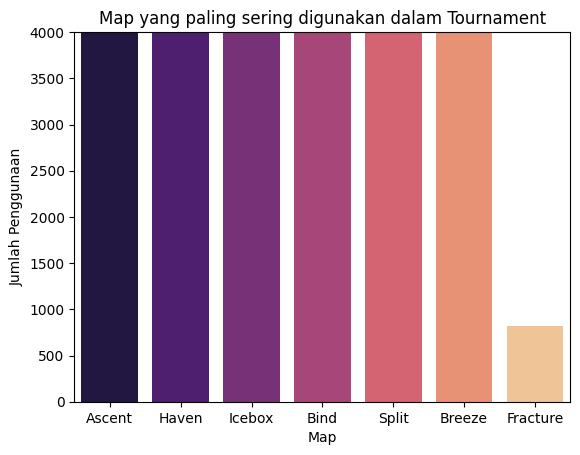

In [32]:
sns.countplot(df, x='Map', order=map_played_counts.index, palette='magma').set_ylim(0,4000)
plt.title('Map yang paling sering digunakan dalam Tournament')
plt.xlabel('Map')
plt.ylabel('Jumlah Penggunaan')
plt.show()

In [33]:
print("Berdasarkan dataset tersebut, Map yang paling sering digunakan dalam tournament Valorant adalah", map_played_counts.index[0])
print("Dengan jumlah game yang dimainkan di map tersebut sebanyak", map_played_counts.values[0])

NameError: name 'map_played_counts' is not defined